# Clustering Techniques-Iris Dataset

## 1. Loading and preprocessing

In [275]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [277]:
### a.Loading the Iris dataset
iris = load_iris()

In [279]:
### b.Dropping the species column
data = pd.DataFrame(iris.data, columns=iris.feature_names) ## iris data set is actually a classification problem. It has target value. But we are not taking target for analysis as it is custering
data                  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [281]:
# Checking for null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [283]:
# Finding duplicate values
data.duplicated().sum()

1

In [285]:
# Removing duplicate value
data=data.drop_duplicates()

In [287]:
# Recheking after removing duplicate values
data.duplicated().sum()

0

In [289]:
X=data
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2. Clustering Algorithm Implementation

## a. KMeans Clustering

In [293]:
from sklearn.cluster import KMeans

In [295]:
# Elbow Method- To find best k value
wcss=[]                               # sum of square within the cluster
for i in range(1,10):                 # find the sum of square value with k value
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss:",kmeans.inertia_) 

k: 1 wcss: 678.9328859060402
k: 2 wcss: 151.9968671383648
k: 3 wcss: 78.11184615384614
k: 4 wcss: 56.83295398351649
k: 5 wcss: 49.741027067295455
k: 6 wcss: 38.89266868686868
k: 7 wcss: 34.63263072965682
k: 8 wcss: 36.105625
k: 9 wcss: 28.601981962012058


C:\Users\sam00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sam00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sam00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sam00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

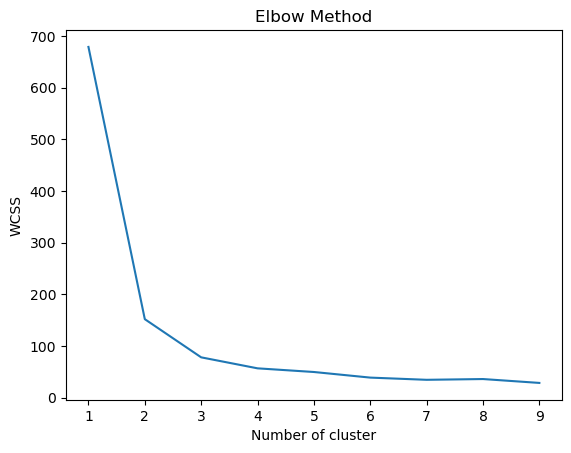

In [297]:
plt.plot(range(1,10),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()  

In [299]:
# applying kmeans clustering with optimal number of clusters
kmeans = KMeans(n_clusters=5, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

C:\Users\sam00\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 3, 4, 1, 3, 3, 1, 0, 1, 3, 1,
       3, 3, 3, 4, 3, 3, 3, 1, 1, 4, 3, 4, 1, 4, 3, 1, 4, 4, 3, 1, 1, 1,
       3, 4, 4, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4])

In [301]:
X['Cluster'] = y_kmeans
X.head(10)

C:\Users\sam00\AppData\Local\Temp\ipykernel_51520\857008087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = y_kmeans


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
5,5.4,3.9,1.7,0.4,2
6,4.6,3.4,1.4,0.3,2
7,5.0,3.4,1.5,0.2,2
8,4.4,2.9,1.4,0.2,2
9,4.9,3.1,1.5,0.1,2


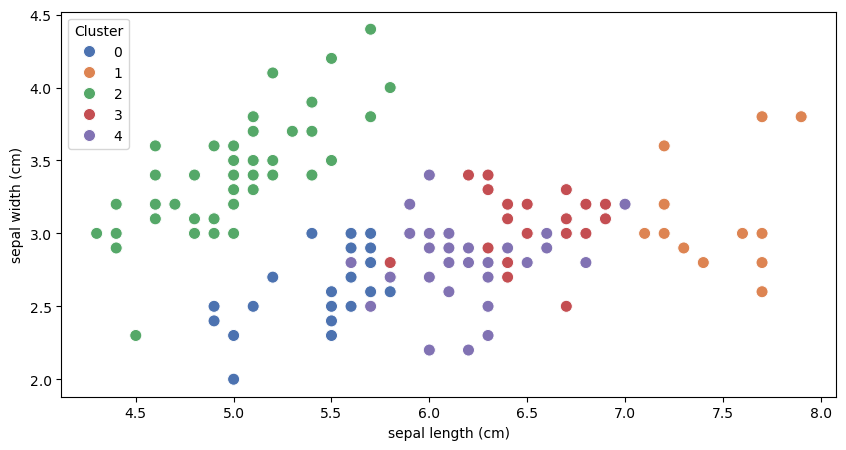

In [345]:
# Plotting the clusters
plt.figure(figsize=(10,5))
sns.scatterplot(data=X, x=X['sepal length (cm)'], y=X['sepal width (cm)'],hue='Cluster',palette='deep', s=75)
plt.show()

## b.Hierarchical Clustering

In [439]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [441]:
#Loading the Iris dataset
iris = load_iris()

In [443]:
# Converting into dataframe
data = pd.DataFrame(iris.data, columns=iris.feature_names) ## iris data set is actually a classification problem. It has target value. But we are not taking target for analysis as it is custering
data  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [445]:
# Checking fior null values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [447]:
# Checking for duplicate values
data.duplicated().sum()

1

In [449]:
# Removing the duplicate value
data=data.drop_duplicates()

In [451]:
# Rechecking for duplicate value
data.duplicated().sum()

0

In [453]:
# Assigning value for X
X=data.iloc[:,:4] # all rows and columns
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [455]:
# using dendrogram to find optimal number of clusters
import scipy.cluster.hierarchy as sch

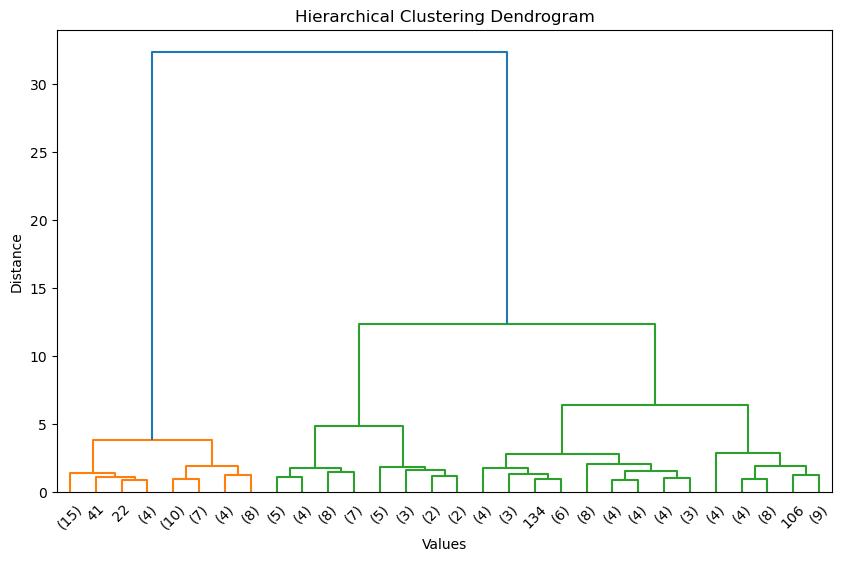

In [457]:
# Plotting dendrogram
plt.figure(figsize=(10, 6))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'),truncate_mode='lastp')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Values')
plt.ylabel('Distance')
plt.show()

In [459]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean',linkage='ward')

In [461]:
# Fitting hierarchial clustering
y_hc=hc.fit_predict(X)  
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 4, 1, 3, 4, 4, 3, 2, 3, 4, 3,
       4, 4, 4, 1, 1, 4, 4, 3, 3, 1, 4, 1, 3, 1, 4, 3, 1, 1, 4, 3, 3, 3,
       4, 1, 1, 3, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1], dtype=int64)

In [463]:
# Adding cluster labels to the DataFrame
data['Cluster'] = y_hc

C:\Users\sam00\AppData\Local\Temp\ipykernel_51520\4032220226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = y_hc


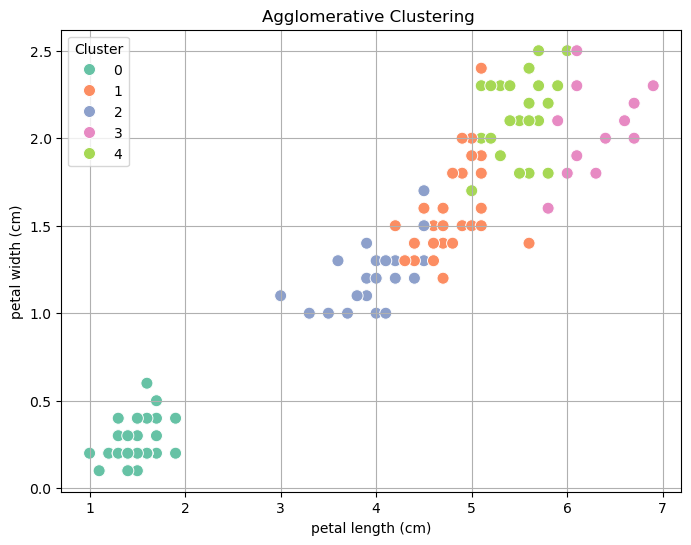

In [465]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='petal length (cm)', y='petal width (cm)', hue='Cluster', palette='Set2', s=75)
plt.title("Agglomerative Clustering ")
plt.grid(True)
plt.show()